In [166]:
#Assignment No 1
--------------------
*Sibt ul Hussain*
----
Goal
======

Your goal in this assigment is to implement a Regularized Support Vector Machine (SVM) Classifier. This is a refresher for getting yourself used to the basic concepts

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

Submission Instructions
----------------------
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

Plagiarism
----------------------
Any form of plagiarism will not be tolerated and result in 0 marks.



SyntaxError: invalid syntax (<ipython-input-166-f09209f36fee>, line 2)

In [230]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [231]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
plt.style.use('fivethirtyeight')

In [233]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import matplotlib.pyplot as plt

Support Vector Machines
-----------------------
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{-1, +1\})$.
Your goal in this assignment is to implement SVM classifier. Recall that a SVM uses the hypothesis $\begin{equation} h_\theta(x) = x^T\theta. \end{equation}$ with the classification rule $sign(h_\theta(x))$. 

In SVM we try to optimize (minimize) following cost function (with $L_2$ regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):

 $$\begin{equation} J_\theta = \frac{1}{2m}\sum_{i=1}^m  max(0,1-y^{(i)} x^{(i) T}\theta)+ \lambda \frac{1}{2}\sum_{i=1}^k \theta_k^2\end{equation}$$
 
 
Here $m$ is the number of training exmaples.


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




In [344]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000, alpha=0.01, plotcf=True):
    '''
        Finds the minimum of given cost function using gradient descent.
        
        Input:
        ------
            X: can be either a single n X d-dimensional vector 
                or n X d dimensional matrix of inputs            
            
            Y: Must be n X 1-dimensional label vector
            cost_function: a function to be minimized, must return a scalar value
            derivative_cost_function: derivative of cost function w.r.t. paramaters, 
                                       must return partial derivatives w.r.t all d parameters
                                       
            maxniter: maximum number of iterations to run
            alpha: learning rate
            plotcf: If true, plots cost function after every 20 iterations
                    
        Returns:
        ------
            thetas: a d X 1-dimensional vector of cost function parameters 
                    where minimum point occurs (or location of minimum).
    '''
    
    # Remember you must plot the cost function after set of iterations to
    # check whether your gradient descent code is working fine or not...
    eps=0.00001
    #print X.shape
    loss_history = []
    nexamples=float(X.shape[0])
    #np.random.seed(seed=99)
    thetas=np.random.rand(X.shape[1],1)#np.ones((X.shape[1],1))*0.0001
    #print thetas
    for it in xrange(maxniter):
        loss = cost_function(X, Y, thetas)
        #if it % 500 == 0: #record loss after every 500 iterations            
        loss_history.append(loss)
        dthetas = derivative_cost_function (X,Y,thetas)
        thetas = thetas - alpha*dthetas
   
    
    plt.plot(loss_history)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()
    #print 'Value of Cost Function at Minimum Points {}, is {}'.format(thetas,cf[-1])
    
    return thetas

In [345]:
# A placeholder class 
# TODO: You have to implement the following class

### import pdb
## Your code goes here...
# You might need to define auxliary classes for composition.. ?

class SVM:
    ''' Implements the SVM For Classification... '''
    def __init__(self,lembda=5,alpha=0.001,maxniter=20000, scalefeatures=False):     
        """
            lembda= Regularization parameter...
            scalefeatures (boolean)= scale the features
        """
        self.theta=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        self.lembda=lembda
        self.alpha=alpha
        self.maxniter=maxniter
        pass
    
    def hypothesis(self, X,theta):
        '''
            Computes the hypothesis for over given input examples (X) and parameters (thetas).

            Input:
                X: can be either a single n X d-dimensional vector or n X d dimensional matrix
                theta: Must be a d-dimensional vector
            Return:
                The computed hypothesis
        '''
        h = np.dot(X,theta)
        return h
    def cost_function(self, X,Y, theta):
        '''
            Computes the Cost function for given input data (X) and labels (Y).

            Input:
                X: can be either a single n X d-dimensional vector or n X d dimensional matrix of inputs
                theata: must  d X 1-dimensional vector for representing vectors
                Y: Must be n X 1-dimensional label vector
                
            Return:
                Returns the cost of hypothesis with input parameters 
        '''
        example_costs = np.dot (X , theta)
        example_costs = example_costs * Y
        example_costs = 1 - example_costs
        example_costs[example_costs<0] = 0
        
        cost = (np.sum(example_costs))/X.shape[0]
        
        reg_cost = self.lembda * 0.5 * np.sum (theta * theta)
        
        cost = cost + reg_cost
        
        
    
        
        return cost
    def derivative_cost_function(self,X,Y,theta):
        '''
            Computes the derivates of Cost function w.r.t input parameters (thetas)  
            for given input and labels.

            Input:
            ------
                X: can be either a single n X d-dimensional vector or n X d dimensional matrix of inputs
                theata: must  d X 1-dimensional vector for representing vectors
                Y: Must be n X 1-dimensional label vector
            Returns:
            ------
                partial_thetas: a d X 1-dimensional vector of partial derivatives of cost function w.r.t parameters..
        '''
        nexamples=float(X.shape[0])
        dtheta = np.zeros_like(theta)
        example_costs = np.dot (X , theta)
        example_costs = example_costs * Y
        example_costs = 1 - example_costs
        example_costs[example_costs<0] = 0
        example_costs[example_costs>0] = 1
        for j in xrange (X.shape[0]):
            
            dtheta = dtheta - (example_costs[j] * (Y[j] * X[j,:].T).reshape(theta.shape[0],1)) 
        
        dtheta /= X.shape[0]
        dtheta += self.lembda * (theta) 
        return dtheta

    def train(self, X, Y):
        ''' Train SVM classifier using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        
        self.theta =   GradientDescent(X,Y,self.cost_function,self.derivative_cost_function,maxniter=20000, alpha=0.01, plotcf=True)
        
        

        
        
    
    def predict(self, X):
        
        """
        Test the trained perceptron classifier result on the given examples X
        
                   
            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        num_test = X.shape[0]
        
        pclass = np.zeros((num_test , 1))
        scores = np.dot(X , self.theta).reshape(num_test,1)
        
        pclass[scores < 0] = -1
        pclass[scores > 0] = 1

        return pclass
    
    
    def scale_features(self,X):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                X= M x d dimensional data matrix

            Returns:
            --------

                normalized X
        """
        tX=X[:,:-1]
        self.xmin= np.min(tX,axis=0)
        self.xmax= np.max(tX,axis=0)
        
        X[:,:-1]=(tX-self.xmin)/(self.xmax-self.xmin)
        return X


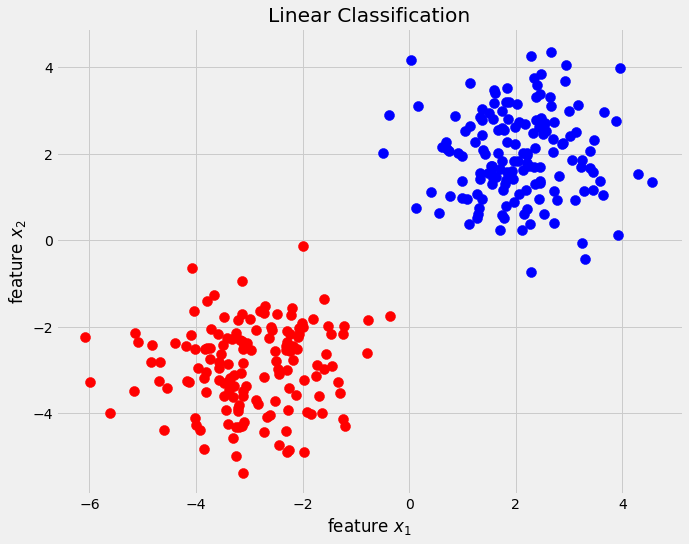

In [346]:
# Create some dummy data for testing

np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=300
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),-1*np.ones((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm.svg',format='svg')

In [347]:
print X.shape,Y.shape

(300, 2) (300, 1)


In [348]:
#Lets append a vector of dummy 1's at the end of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [349]:
print X.shape,Y.shape

(300, 3) (300, 1)


In [350]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function):
    """
        Function test the implementation of the derivative function...
        X: Input test examples (m x d)
        Y: True labels (m x 1)
        cost_function: function used to compute cost function...
        derivative_cost_function: function used to compute derivative of the cost function...
    """    
    thetas=np.random.rand(X.shape[1],1)
    ad=derivative_cost_function(X,Y,thetas)
    print thetas, ad
    eps= 0.00001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [351]:
# %pdb
svmclass=SVM(5,0.001,2000,False)#SVM(2.5,0.005,2000,False)
test_derivative(X,Y,svmclass.cost_function,svmclass.derivative_cost_function)
#svmclass.train(X,Y) # 

[[ 0.62723103]
 [ 0.65201434]
 [ 0.90706938]] [[ 5.65237467]
 [ 5.71157622]
 [ 4.5353469 ]]
diff in direction [[  2.00000000e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  2.00000000e-05]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  0.00000000e+00]
 [  2.00000000e-05]]
Computational derivatvie = [5.6523746656544906, 5.7115762191806132, 4.5353468993702961]
Analytical derivative = (3, 1) [[ 5.65237467  5.71157622  4.5353469 ]]
Their difference= [[  4.30766534e-13]
 [ -6.39959197e-11]
 [  8.27480306e-11]]


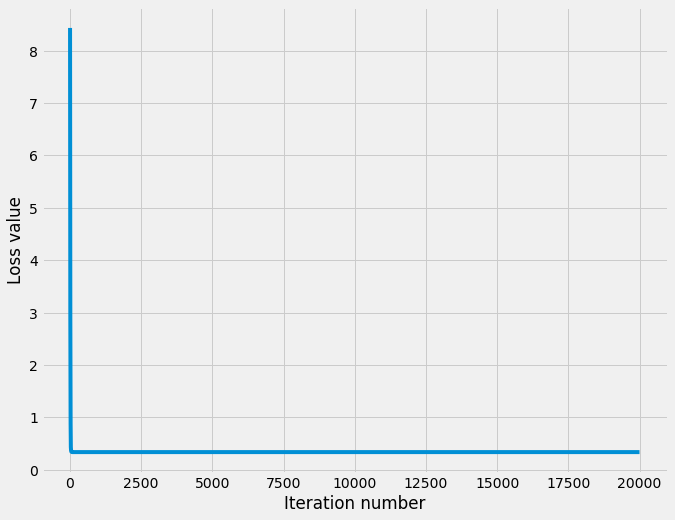

In [352]:
svmclass.train(X,Y) # 

-6.07945486257 4.54877475848
[ 6.17580227] [-4.94154145]


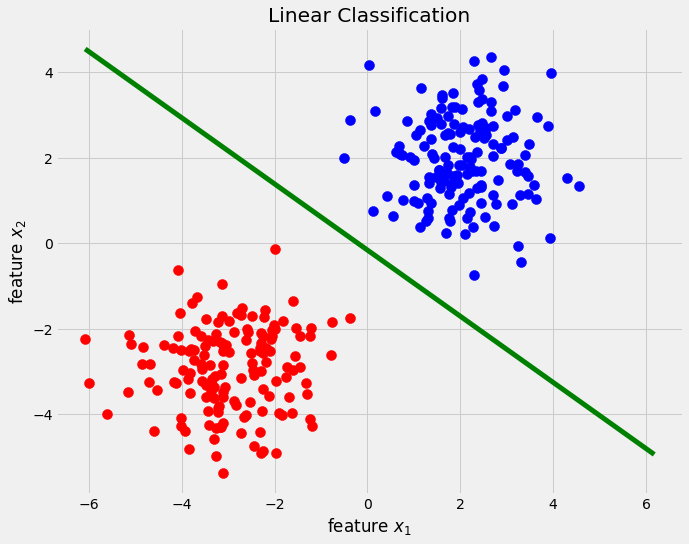

In [353]:
#Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])
print minx, maxx
y1=(-svmclass.theta[2]-svmclass.theta[0]*minx)/svmclass.theta[1]
y2=(-svmclass.theta[2]-svmclass.theta[0]*maxx)/svmclass.theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm-class-lambda1.5.svg',format='svg')

(10000, 3)
[[ 1.]
 [-1.]
 [-1.]
 ..., 
 [-1.]
 [ 1.]
 [ 1.]] [-1.  1.]


/home/kumar/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


(-5.3678375947281065, 4.3540144301612509)

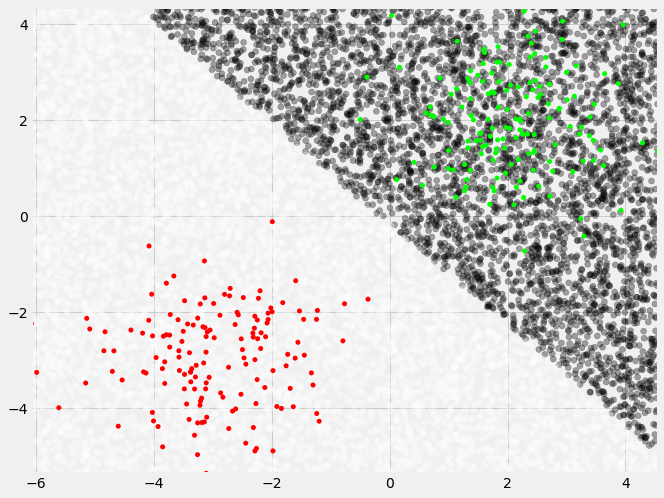

In [354]:
npts=10000
model=svmclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])
tx=np.hstack((tx,np.ones((tx.shape[0],1))))

print tx.shape
cs= model.predict(tx)
print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

In [355]:
#load the data set
data=pd.read_csv('iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [356]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [357]:
np.reshape(Y , (Y.shape[0],1))

Y[Y=='Iris-virginica']='Iris-versicolor'
#print Y, len(Y), np.unique(Y)

In [358]:
Y[Y=='Iris-versicolor']=-1
Y[Y=='Iris-setosa']=+1
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))
Y=Y.reshape((len(Y),1))

In [360]:
svmclass=SVM()
feat=[0,1,4]
svmclass=SVM(0.01,0.001,10000,False)#SVM(2.5,0.005,2000,False)

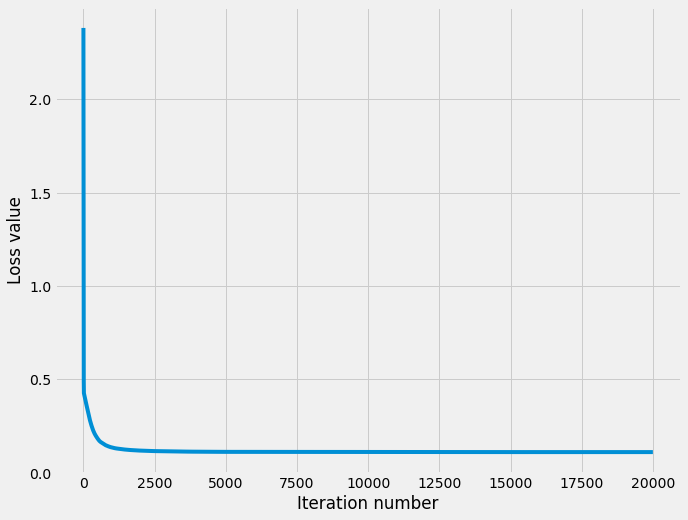

In [361]:
svmclass.train(X[:,feat],Y) # your cost function at the minimum must be zero...

(1000, 3)


/home/kumar/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


(2.0, 4.4000000000000004)

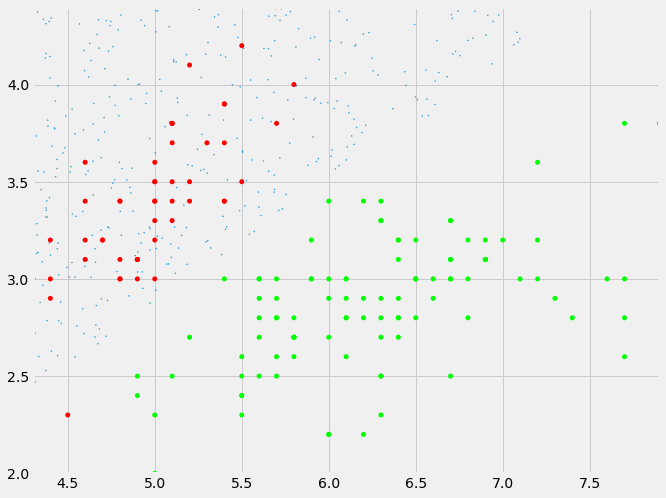

In [362]:
#%pdb
npts=1000
model=svmclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])
tx=np.hstack((tx,np.ones((tx.shape[0],1))))
print tx.shape
cs= model.predict(tx)
#print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],cs.ravel(), alpha=.75)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

4.3 7.9 [2.418027669739561] [4.669495973933985]


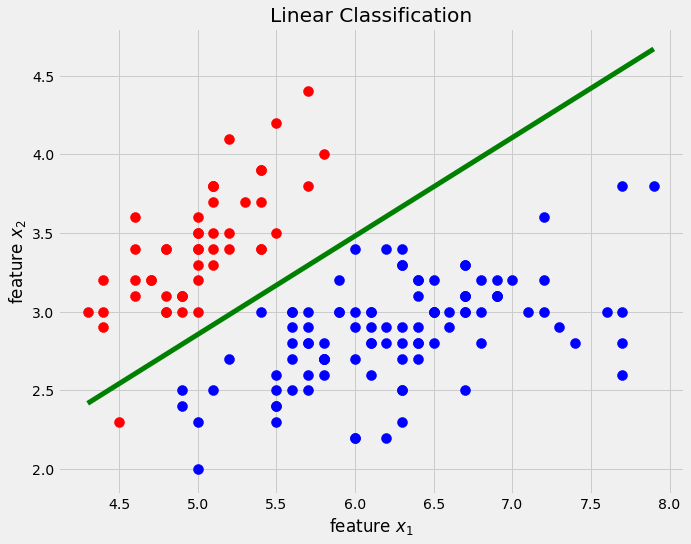

In [363]:
#Lets plot the decision boundary...
plt.scatter(X[Y.ravel()==1,0],X[Y.ravel()==1,1], c='r', s=100)
plt.scatter(X[Y.ravel()==-1,0],X[Y.ravel()==-1,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])
y1=(-svmclass.theta[2]-svmclass.theta[0]*minx)/svmclass.theta[1]
y2=(-svmclass.theta[2]-svmclass.theta[0]*maxx)/svmclass.theta[1]
print minx,maxx, y1, y2
plt.plot([minx,maxx],[y1,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm-class.svg',format='svg')


In [364]:
def print_confusion_matrix(plabels,tlabels):
    """
        functions print the confusion matrix for the different classes
        to find the error...
        
        Input:
        -----------
        plabels: predicted labels for the classes...
        tlabels: true labels for the classes
        
        code from: http://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
    """
    import pandas as pd
    plabels = pd.Series(plabels)
    tlabels = pd.Series(tlabels)
    
    # draw a cross tabulation...
    df_confusion = pd.crosstab(tlabels,plabels, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    #print df_confusion
    return df_confusion

In [365]:
# see the documentation of split_data in tools for further information...
import sklearn.cross_validation
Xtrain,Xtest,Ytrain,Ytest=sklearn.cross_validation.train_test_split(X,Y,test_size=0.3)
#Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y.ravel())
Ytrain=Ytrain.reshape(len(Ytrain),1)
Ytest=Ytest.reshape(len(Ytest),1)
print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape   


 Training Data Set Dimensions= (104, 5) Training True Class labels dimensions (104, 1)
 Test Data Set Dimensions= (45, 5) Test True Class labels dimensions (45, 1)


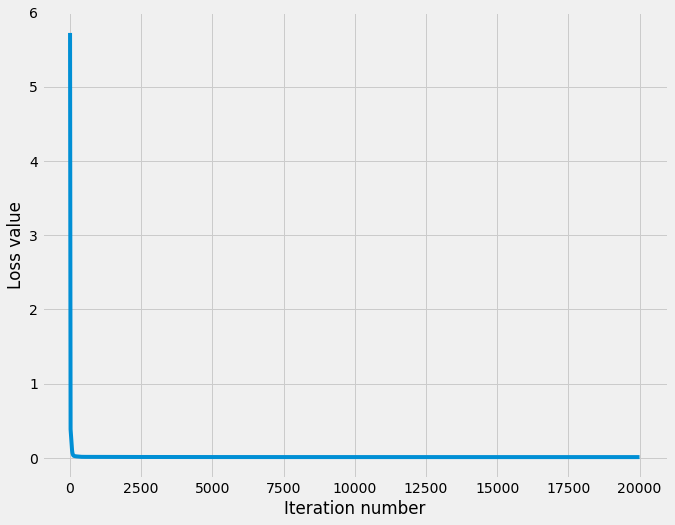

In [366]:
svmclass.train(Xtrain,Ytrain) # your cost function at the minimum must be zero...

In [367]:
#Lets test it on the set of unseen examples...
pclasses=svmclass.predict(Xtest)

In [368]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])


45
Accuracy =  1.0


In [369]:
print_confusion_matrix(pclasses.ravel(),Ytest.ravel())

Predicted  -1.0  1.0  All
Actual                   
-1           30    0   30
1             0   15   15
All          30   15   45